Load the Dataset

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Understand the Data

In [38]:
# Display dataset information
print(df.info())

# Display basic statistics for numerical columns
print(df.describe())

# Display basic statistics for categorical columns
print(df.describe(include=['O']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [39]:
# Check for missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Handle Missing Values

In [40]:
# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to a high number of missing values
df.drop(columns=['Cabin'], inplace=True)


C:\Users\mittal\AppData\Local\Temp\ipykernel_26592\2595257649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\mittal\AppData\Local\Temp\ipykernel_26592\2595257649.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Convert Categorical Variables

In [41]:
# Check for duplicate rows
print(df.duplicated().sum())
# Drop duplicates if any
df.drop_duplicates(inplace=True)


0


In [42]:
# Convert 'Survived' to categorical type
df['Survived'] = df['Survived'].astype('category')

# Convert 'Pclass' to categorical type
df['Pclass'] = df['Pclass'].astype('category')


In [43]:
# Overview of the data
print(df.describe())
print(df.info())


       PassengerId         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000   29.361582    0.523008    0.381594   32.204208
std     257.353842   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000   22.000000    0.000000    0.000000    7.910400
50%     446.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000   35.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    

Select Only Numeric Columns

In [28]:
# Drop non-numeric columns that are not useful for correlation
df_numeric = df.select_dtypes(include=[np.number])

# Alternatively, you can manually specify which columns to include if you want to keep specific numeric columns:
# df_numeric = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]


Exploratory Data Analysis (EDA)

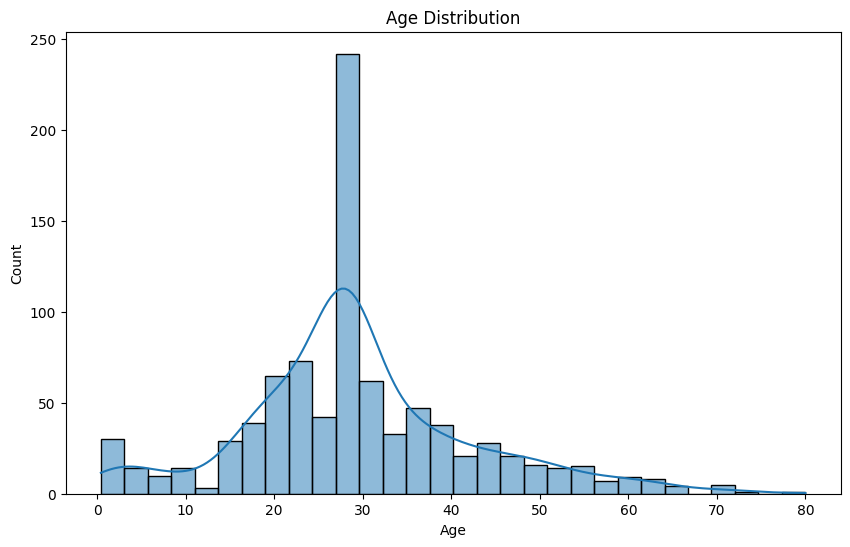

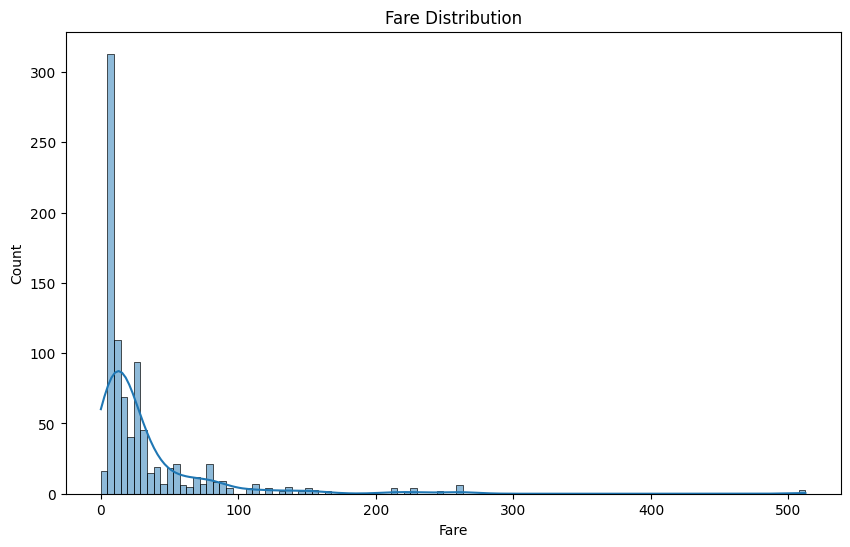

In [45]:
# Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


Categorical Features

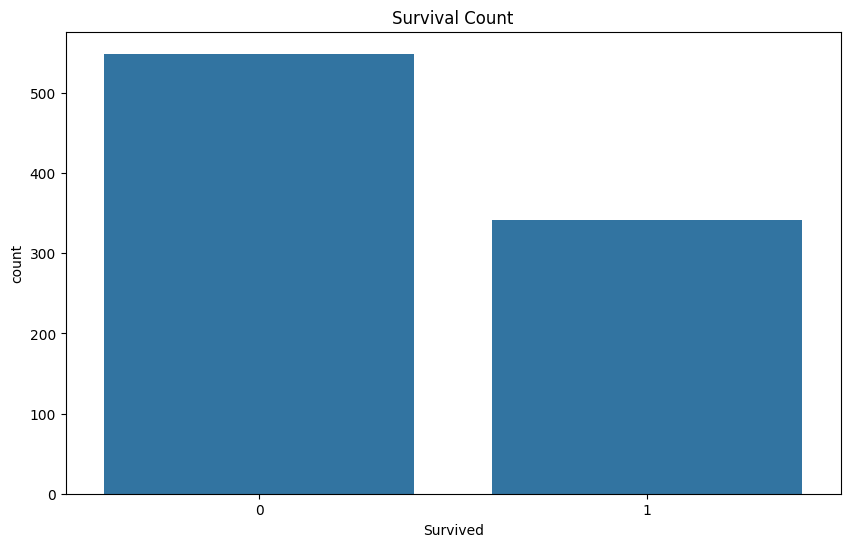

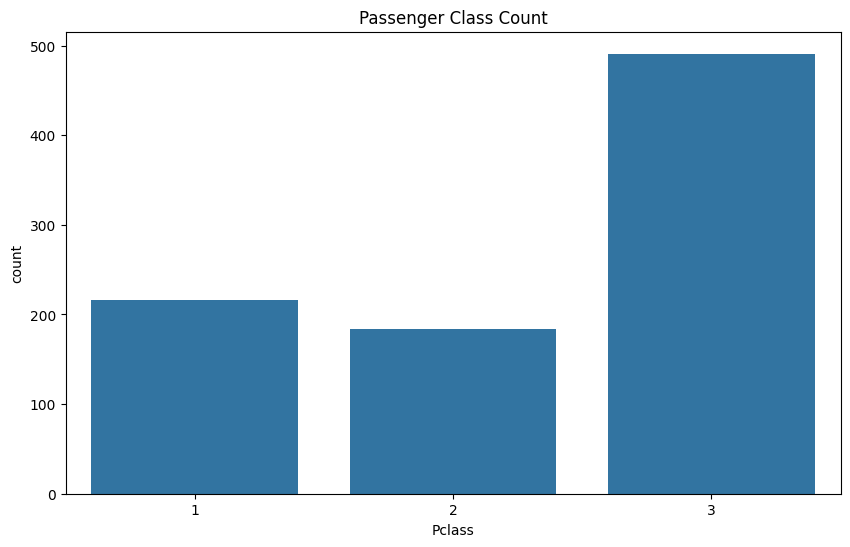

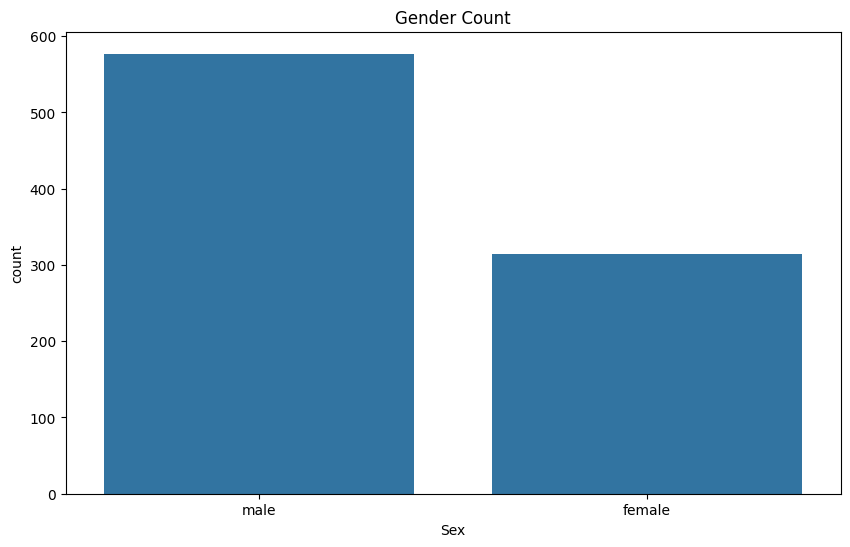

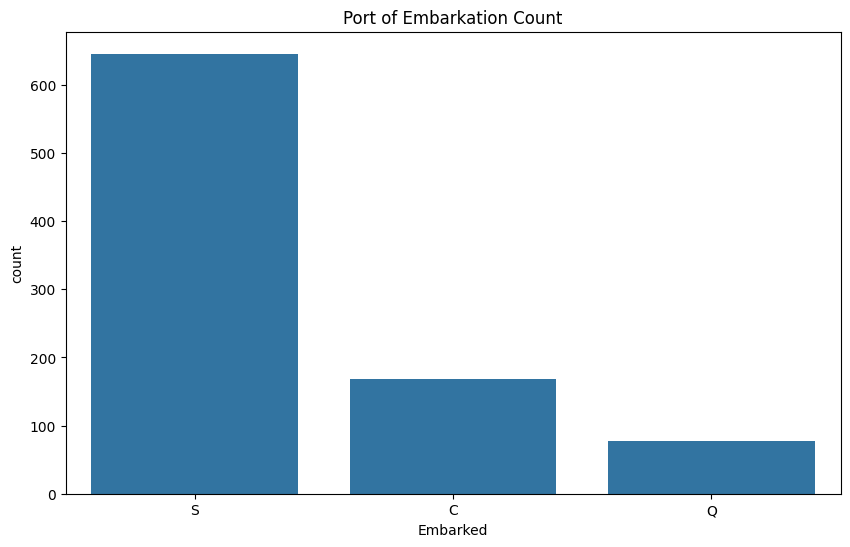

In [46]:
# Count plot for 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Count plot for 'Pclass'
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()

# Count plot for 'Sex'
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()

# Count plot for 'Embarked'
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Port of Embarkation Count')
plt.show()


Relationship Between Features:

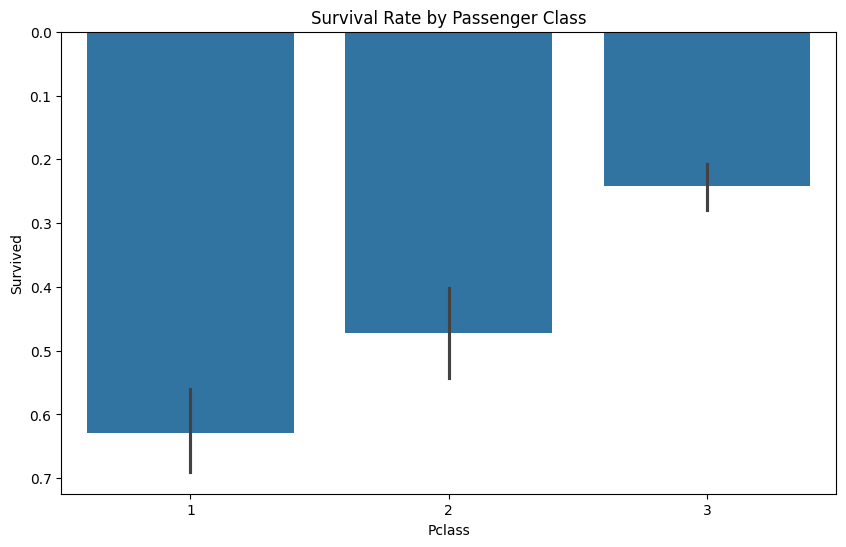

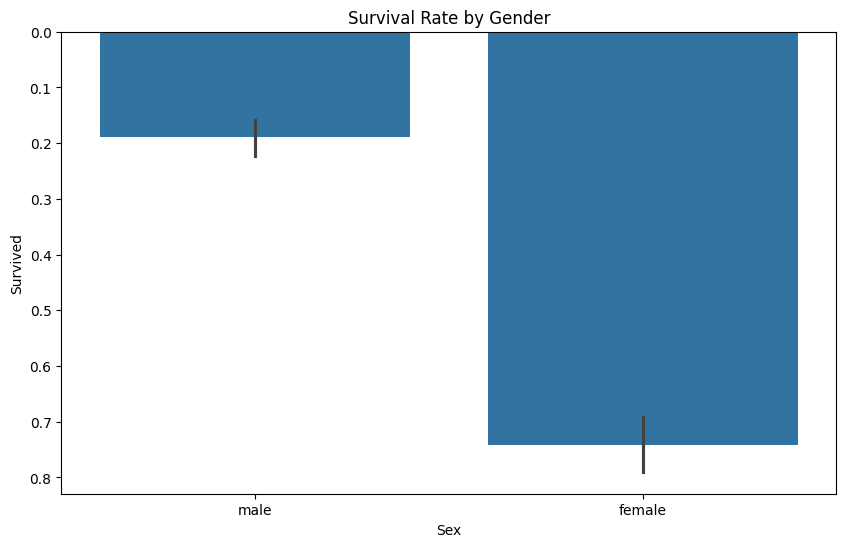

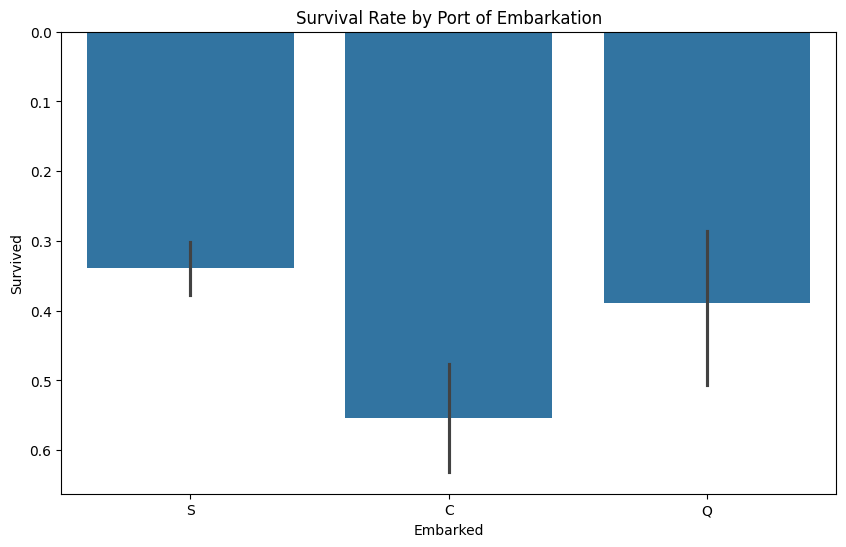

In [47]:
# Survival rate by 'Pclass'
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Survival rate by 'Sex'
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by 'Embarked'
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.show()


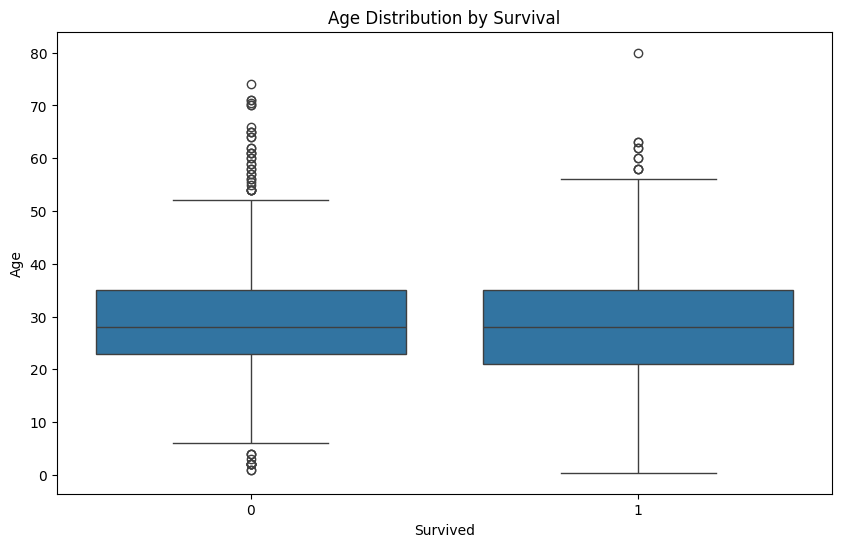

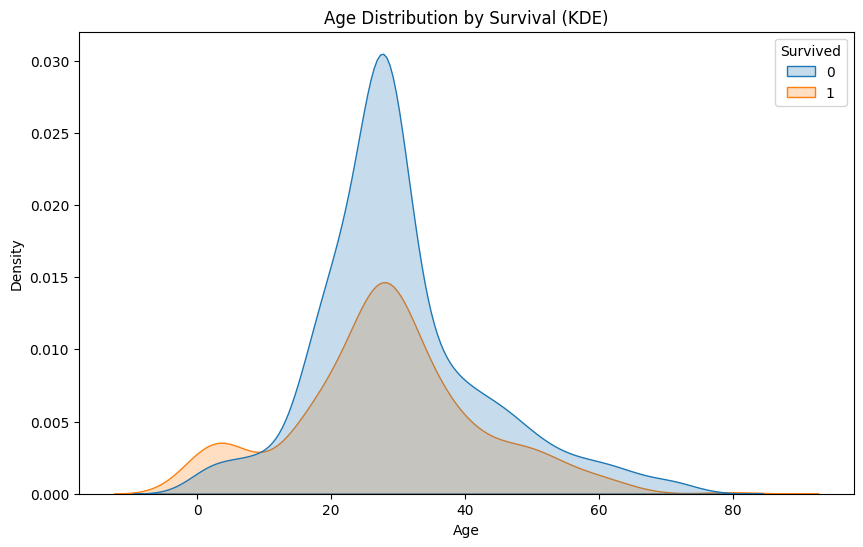

In [48]:
# Box plot of 'Age' by 'Survived'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# KDE plot of 'Age' by 'Survived'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution by Survival (KDE)')
plt.show()


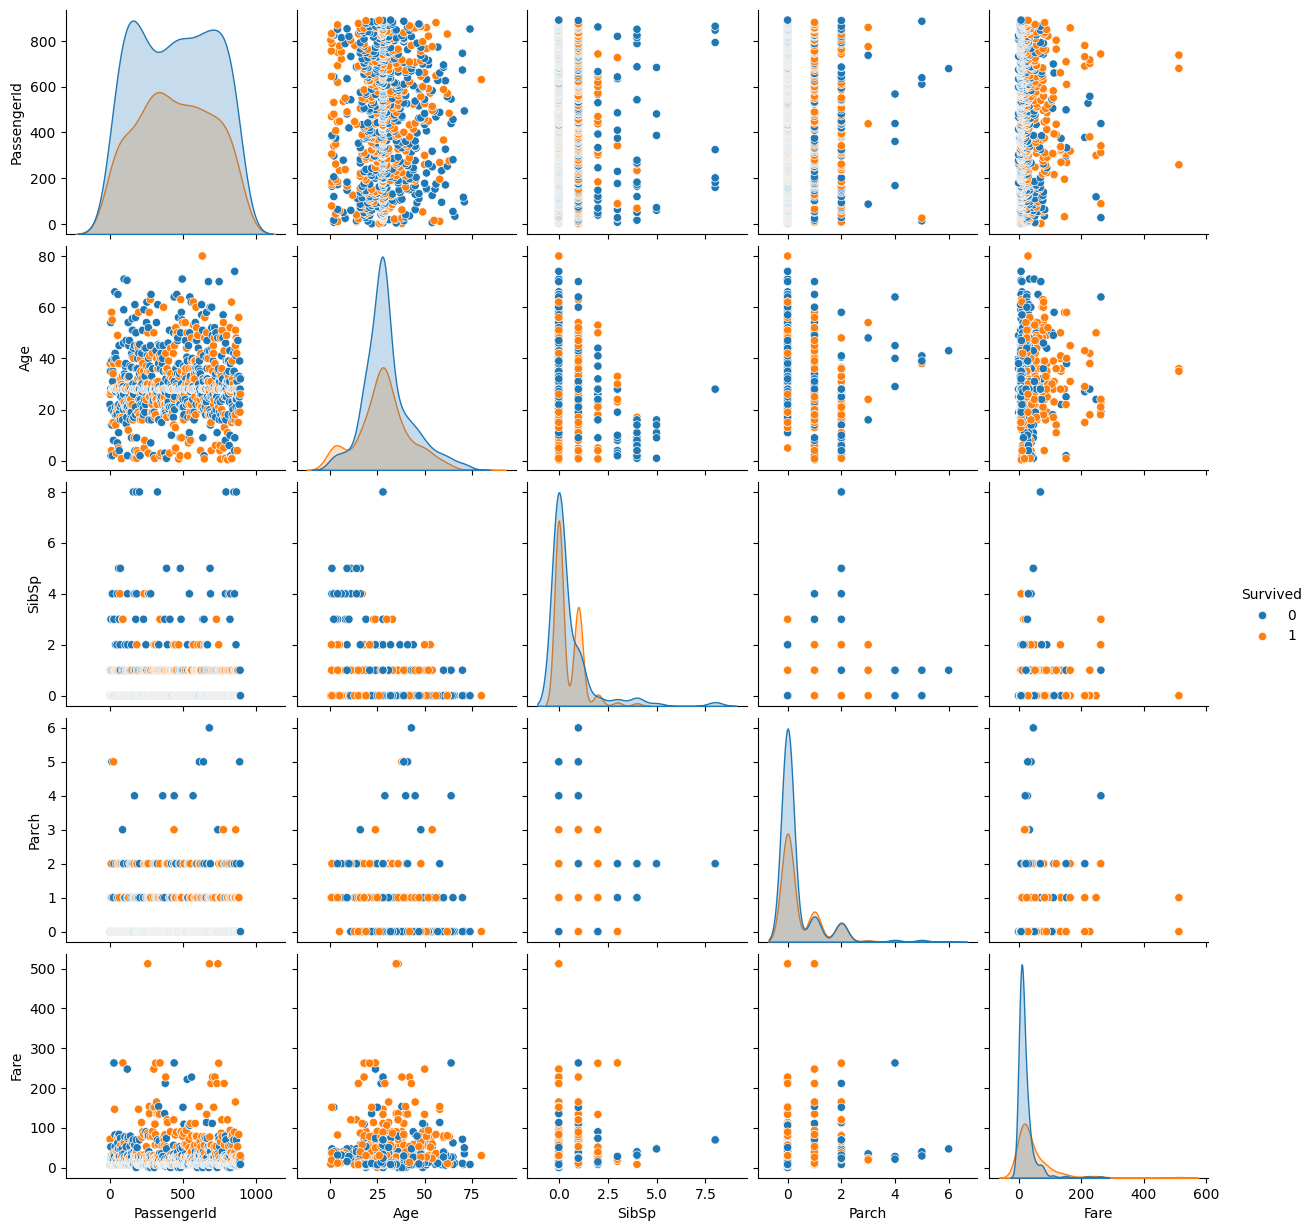

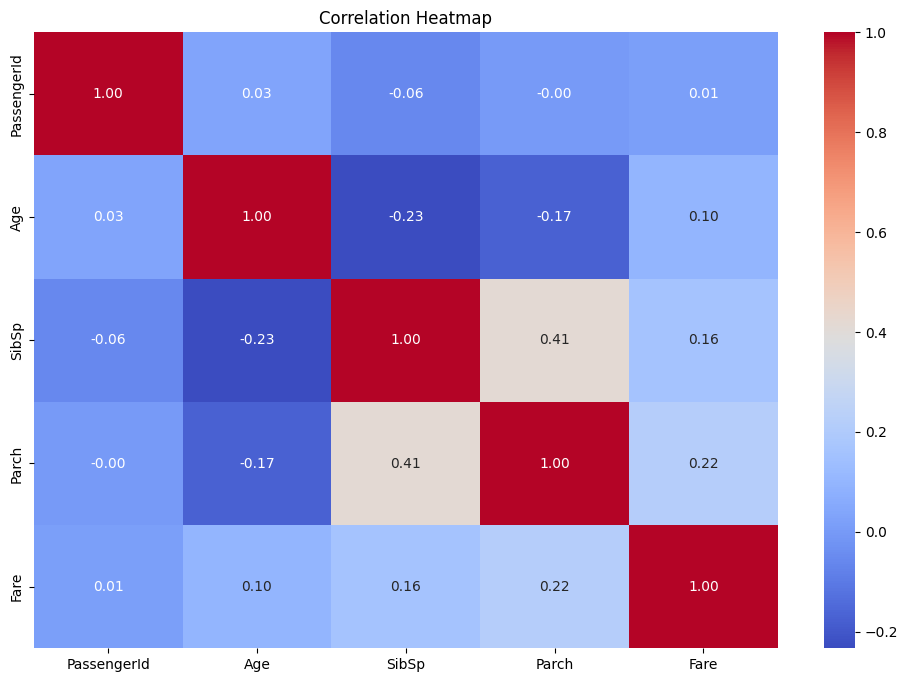

In [50]:
# Pairplot to see pairwise relationships
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()

# Select only the numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


